In [1]:
from pythtb import W90  
import matplotlib.pyplot as plt

In [2]:
silicon = W90(r"silicon_w90", r"silicon")

In [3]:
my_model = silicon.model(min_hopping_norm=0.01)

In [4]:
path = [
    [0.5, 0.5, 0.5],
    [0.0, 0.0, 0.0],
    [0.5, -0.5, 0.0],
    [0.375, -0.375, 0.0],
    [0.0, 0.0, 0.0],
]
# labels of the nodes
k_label = (r"$L$", r"$\Gamma$", r"$X$", r"$K$", r"$\Gamma$")
# call function k_path to construct the actual path
(k_vec, k_dist, k_node) = my_model.k_path(path, 101)

----- k_path report -----
Real-space lattice vectors:
 [[-2.6988  0.      2.6988]
 [ 0.      2.6988  2.6988]
 [-2.6988  2.6988  0.    ]]
K-space metric tensor:
 [[ 0.10297 -0.03432 -0.03432]
 [-0.03432  0.10297 -0.03432]
 [-0.03432 -0.03432  0.10297]]
Nodes (reduced coords):
 [[ 0.5    0.5    0.5  ]
 [ 0.     0.     0.   ]
 [ 0.5   -0.5    0.   ]
 [ 0.375 -0.375  0.   ]
 [ 0.     0.     0.   ]]
Reciprocal-space vectors:
 [[-0.18527 -0.18527  0.18527]
 [ 0.18527  0.18527  0.18527]
 [-0.18527  0.18527 -0.18527]]
Nodes (Cartesian coords):
 [[-9.26338e-02  9.26338e-02  9.26338e-02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-1.85268e-01 -1.85268e-01  0.00000e+00]
 [-1.38951e-01 -1.38951e-01 -6.93889e-18]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]]
Segments:
  Node 0 [0.5 0.5 0.5] to Node 1 [0. 0. 0.]: distance = 0.16045
  Node 1 [0. 0. 0.] to Node 2 [ 0.5 -0.5  0. ]: distance = 0.26201
  Node 2 [ 0.5 -0.5  0. ] to Node 3 [ 0.375 -0.375  0.   ]: distance = 0.06550
  Node 3 [ 0.375 -0.375  0

In [5]:
evals = my_model.solve_ham(k_vec)

[Text(0.0, 0, '$L$'),
 Text(0.16044638427902008, 0, '$\\Gamma$'),
 Text(0.42245423265109194, 0, '$X$'),
 Text(0.4879561947441099, 0, '$K$'),
 Text(0.6844620810231639, 0, '$\\Gamma$')]

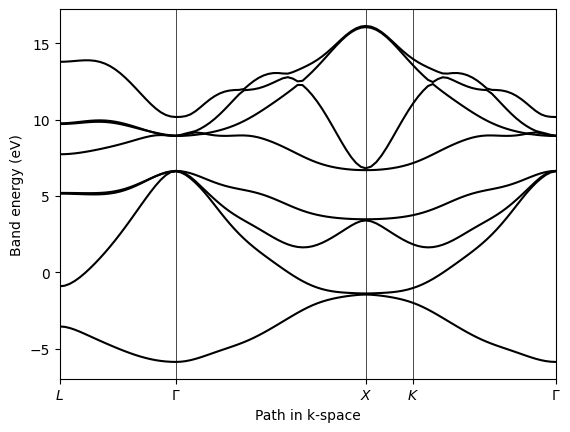

In [6]:
fig, ax = plt.subplots()

ax.plot(k_dist, evals, "k-")

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy (eV)")
ax.set_xlim(k_dist[0], k_dist[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)